# LINEAR REGRESSION EXERCICE

I will try to decribe in this exercice three different appoaches to calculate a linear regression model for a random set of data

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And the cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

In order to calculate the parameters $\theta_0$ and $\theta_1$ that defines the model, three approaches have been considered:

 * Mathematical approach
 * Gradient descent by analitical approach 
 * Gradient descent by numerical approach 


### Generate dummy data

First of all, the random data set is created.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

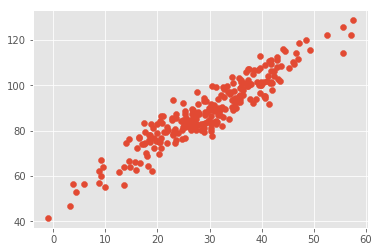

In [24]:
theta_real_0 = 50
theta_real_1 = 1.3

xs = np.random.normal(30.0, 10.0,250)
ys = theta_real_0 + theta_real_1 * xs + np.random.normal(0, 5.0,250)

plt.scatter(xs,ys)

### COST FUNCTION

In this section, cost function is defined and calculated with random $\theta_0$ and $\theta_1$, just as an example.

In [25]:
theta_0 = theta_real_0
theta_1 = theta_real_1

m = len(xs)

cost_function = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
print('Example of cost function value:', cost_function)

Example of cost function value: 25.53002071924891


### MATHEMATICAL APPROACH

The $\theta_0$ and $\theta_1$ formulae that minimizes the cost function are the followings:


$$\theta_1 = \frac{\sum_{i=1}^m({x}_i-\bar{x}).({y}_i-\bar{y})}{\sum_{i=1}^m({x}_i-\bar{x})^2} $$


$$\theta_0 = \bar{y} - \theta_1.\bar{x} $$

Where $\bar{x}$ and $\bar{y}$ are the average of x and y data sets, respectively.

In [34]:
xs_mean = xs.mean()
ys_mean = ys.mean()
theta_1_function = ((xs-xs_mean)*(ys-ys_mean)).sum() / ((xs-xs_mean)**2).sum()
theta_0_function = ys_mean - theta_1_function * xs_mean
cost_function_min = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()

print('Average of xs =', xs_mean)
print('Average of ys =', ys_mean)
print('Theta_0 =', theta_0_function)
print('Theta_1 =', theta_1_function)
print('Minimum Cost Function value =', cost_function_min)

Average of xs = 29.57076140403081
Average of ys = 88.570135264343
Theta_0 = 48.99403819346379
Theta_1 = 1.3383523180260268
Minimum Cost Function value = 25.360467255645823


## GRADIENT DESCENT BY ANALITICAL APPROACH

In order to find $\theta_0$ and $\theta_1$ by gradient descent, partial differentials of the cost function must be calculated:

$$\frac{\partial}{\partial\theta_0} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial}{\partial\theta_1} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

The way to minimize the cost funcion is varying $\theta_0$ and $\theta_1$ following the steepest gradient. This can be done by multipling the partial differentials by a negative small factor (learning rate or alpha) in an iterative loop.

Theta_0 =  48.99193575135039
Theta_1 =  1.338415859323848
Final cost_function value =  25.36046749087736
Number of iterations =  94398
Final Cost function difference = 9.99911264898401e-11


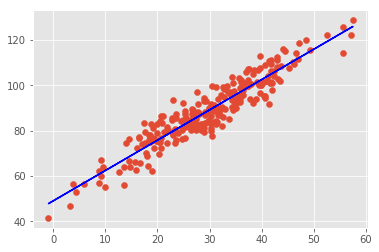

In [36]:
i = 0                           #Iterations
i_limit = 100000                #Maximum number of iterations
alpha = 0.001                   #Learning rate
theta_0 = 1                     #Initialization of variables theta_0 with a random value
theta_1 = 1                     #Initialization of variables theta_1 with a random value
diff = 1                        #Cost function difference between consecutive iterations
diff_limit = 0.0000000001       #Maximium cost function difference between consecutive iterations
 
cost_function_1 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()   #First Cost function
G_theta_0 = (2/m) * ((theta_1 * xs + theta_0) - ys).sum()              #First partial difference for theta_0
G_theta_1 = (2/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()      #First partial difference for theta_1

while diff > diff_limit and i < i_limit:
    
    theta_0 = theta_0 - alpha * G_theta_0    #Gradient descent for theta_0
    theta_1 = theta_1 - alpha * G_theta_1    #Gradient descent for theta_1
    
    cost_function_2 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
    diff = abs(cost_function_1 - cost_function_2)
    
    G_theta_0 = (1/m) * ((theta_1 * xs + theta_0) - ys).sum()
    G_theta_1 = (1/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()
    cost_function_1 = cost_function_2
    i += 1

print('Theta_0 = ', theta_0)
print('Theta_1 = ', theta_1)
print('Final cost_function value = ', cost_function_2)
print('Number of iterations = ', i)
print('Final Cost function difference =', diff)

ys_pred = theta_0 + theta_1 * xs

plt.scatter(xs,ys)
plt.plot(xs,ys_pred,color='b')

In order to check that this approac is OK, the difference between this result and the Mathematical approach is calculated

In [37]:
theta_0_error = abs(theta_0 - theta_0_function) / theta_0_function * 100
theta_1_error = abs(theta_1 - theta_1_function) / theta_1_function * 100
cost_function_error = abs(cost_function_2 - cost_function_min) / cost_function_min * 100
print('Theta_0 error in % is: ', theta_0_error)
print('Theta_1 error in % is: ', theta_1_error)
print('Cost function error in % is: ', cost_function_error)

Theta_0 error in % is:  0.00429122030132588
Theta_1 error in % is:  0.004747725764384355
Cost function error in % is:  9.275520705712771e-07


NOTE: Possibly I am wrong, but I think there is a '2' missing in the partial differences formulae. In my opinion the correct ones are:

$$\frac{\partial}{\partial\theta_0} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial}{\partial\theta_1} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

So, in order to check that this difference do not affect sificantly the results, the same calculations are done considering the above formulae.

Theta_0 =  48.99255183529816
Theta_1 =  1.3383972396561015
Final cost_function value =  25.360467255645823
Number of iterations =  48828
Final Cost function difference = 9.99662574940885e-11


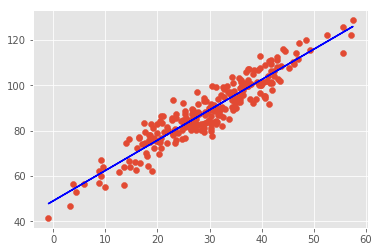

In [38]:
i = 0                           #Iterations
i_limit = 100000                #Maximum number of iterations
alpha = 0.001                   #Learning rate
theta_0 = 1                     #Initialization of variables theta_0 with a random value
theta_1 = 1                     #Initialization of variables theta_1 with a random value
diff = 1                        #Cost function difference between consecutive iterations
diff_limit = 0.0000000001       #Maximium cost function difference between consecutive iterations
 
cost_function_1 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()   #First Cost function
G_theta_0 = (2/m) * ((theta_1 * xs + theta_0) - ys).sum()              #First partial difference for theta_0
G_theta_1 = (2/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()      #First partial difference for theta_1

while diff > diff_limit and i < i_limit:
    
    theta_0 = theta_0 - alpha * G_theta_0    #Gradient descent for theta_0
    theta_1 = theta_1 - alpha * G_theta_1    #Gradient descent for theta_1
    
    cost_function_2 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
    diff = abs(cost_function_1 - cost_function_2)
    
    G_theta_0 = (2/m) * ((theta_1 * xs + theta_0) - ys).sum()
    G_theta_1 = (2/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()
    cost_function_1 = cost_function_2
    i += 1

print('Theta_0 = ', theta_0)
print('Theta_1 = ', theta_1)
print('Final cost_function value = ', cost_function_2)
print('Number of iterations = ', i)
print('Final Cost function difference =', diff)

ys_pred = theta_0 + theta_1 * xs

plt.scatter(xs,ys)
plt.plot(xs,ys_pred,color='b')

In [39]:
theta_0_error = abs(theta_0 - theta_0_function) / theta_0_function * 100
theta_1_error = abs(theta_1 - theta_1_function) / theta_1_function * 100
cost_function_error = abs(cost_function_2 - cost_function_min) / cost_function_min * 100
print('Theta_0 error in % is: ', theta_0_error)
print('Theta_1 error in % is: ', theta_1_error)
print('Cost function error in % is: ', cost_function_error)

Theta_0 error in % is:  0.0030337531267771267
Theta_1 error in % is:  0.0033564876355495717
Cost function error in % is:  0.0


It can be concluded that, despite the fact both results are similar, the last one reaches the solution after "only" 48828 iterations, and the first one (considering the former formulea without '2') after 94398. So, it seems that the '2' version is better.

## CALCULATION BY NUMERICAL APPROACH

The last approach I am going to try is the numerical one. The methodology it is completely simiar to the analitical approach, but instead of considering the analitical formulae for partial differences, an incremental approximation is used. The advantage of this approach is that it can be used with regressions not as easy to derivate analitically as linear regression is, (or when you do not know how to obtain the gradient's formulae).

In this case, the formulae are the followings:

$$\frac{\partial J(\theta_0,\theta_1)}{\partial\theta_0} \simeq \frac{\Delta J(\theta_0,\theta_1)}{\Delta\theta_0} = \frac{J(\theta_0+\Delta \theta_0,\theta_1)-J(\theta_0,\theta_1)}{\Delta \theta_0}$$

$$\frac{\partial J(\theta_0,\theta_1)}{\partial\theta_1} \simeq \frac{\Delta J(\theta_0,\theta_1)}{\Delta\theta_1} = \frac{J(\theta_0,\theta_1+\Delta \theta_1)-J(\theta_0,\theta_1)}{\Delta \theta_1}$$

Theta_0 =  48.950025839710634
Theta_1 =  1.3390128356897817
Final cost_function value =  25.361111728416777
Number of iterations =  64234
Final Cost function difference = 9.99875737761613e-11


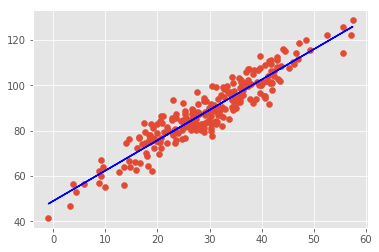

In [41]:
i = 0
i_limit = 100000    #Maximum number of iterations
alpha = 0.001
beta = 1.001        #For convenience, I am using a multiplication factor instead of an additive factor (Delta)), 
theta_0 = 1         #Initialization of variables theta_0 with a random value. Warning: it cannot be 0!!!
theta_1 = 1         #Initialization of variables theta_1 with a random value. Warning: it cannot be 0!!!
diff = 1
diff_limit = 0.0000000001 

cost_function_1 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
cost_function_1_GN_0 = (1/m) * ((((theta_1 * xs) + (beta * theta_0)) - ys)**2).sum()
cost_function_1_GN_1 = (1/m) * ((((beta * theta_1) * xs + theta_0) - ys)**2).sum()

GN_theta_0 = (cost_function_1_GN_0 - cost_function_1) / (theta_0 * (beta - 1))
GN_theta_1 = (cost_function_1_GN_1 - cost_function_1) / (theta_1 * (beta - 1))

while diff > diff_limit and i < i_limit:
    
    theta_0 = theta_0 - alpha * GN_theta_0
    theta_1 = theta_1 - alpha * GN_theta_1
    cost_function_2 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
    
    diff = abs(cost_function_1 - cost_function_2)

    cost_function_1_GN_0 = (1/m) * ((((theta_1 * xs) + (beta * theta_0)) - ys)**2).sum()
    cost_function_1_GN_1 = (1/m) * ((((beta * theta_1) * xs + theta_0) - ys)**2).sum()
    GN_theta_0 = (cost_function_1_GN_0 - cost_function_2) / (theta_0 * (beta - 1))
    GN_theta_1 = (cost_function_1_GN_1 - cost_function_2) / (theta_1 * (beta - 1))

    cost_function_1 = cost_function_2
    i += 1


print('Theta_0 = ', theta_0)
print('Theta_1 = ', theta_1)
print('Final cost_function value = ', cost_function_2)
print('Number of iterations = ', i)
print('Final Cost function difference =', diff)

ys_pred = theta_0 + theta_1 * xs

plt.scatter(xs,ys)
plt.plot(xs,ys_pred,color='b')

The differences with the mathematical calculation are similar than the analitical approach:

In [42]:
theta_0_error = abs(theta_0 - theta_0_function) / theta_0_function * 100
theta_1_error = abs(theta_1 - theta_1_function) / theta_1_function * 100
cost_function_error = abs(cost_function_2 - cost_function_min) / cost_function_min * 100
print('Theta_0 error in % is: ', theta_0_error)
print('Theta_1 error in % is: ', theta_1_error)
print('Cost function error in % is: ', cost_function_error)

Theta_0 error in % is:  0.0898320599321919
Theta_1 error in % is:  0.04935304813676207
Cost function error in % is:  0.0025412495931468985
